## CONFIDENCE INTERVALS

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [39]:
#sample data: customer spending in dollars (randomly simulated)

cs = np.arange(45, 1441, 5)  
print(cs)


[  45   50   55   60   65   70   75   80   85   90   95  100  105  110
  115  120  125  130  135  140  145  150  155  160  165  170  175  180
  185  190  195  200  205  210  215  220  225  230  235  240  245  250
  255  260  265  270  275  280  285  290  295  300  305  310  315  320
  325  330  335  340  345  350  355  360  365  370  375  380  385  390
  395  400  405  410  415  420  425  430  435  440  445  450  455  460
  465  470  475  480  485  490  495  500  505  510  515  520  525  530
  535  540  545  550  555  560  565  570  575  580  585  590  595  600
  605  610  615  620  625  630  635  640  645  650  655  660  665  670
  675  680  685  690  695  700  705  710  715  720  725  730  735  740
  745  750  755  760  765  770  775  780  785  790  795  800  805  810
  815  820  825  830  835  840  845  850  855  860  865  870  875  880
  885  890  895  900  905  910  915  920  925  930  935  940  945  950
  955  960  965  970  975  980  985  990  995 1000 1005 1010 1015 1020
 1025 

In [40]:
#step 1: compute the sample mean and standard error
sm = np.mean(cs)
ss = np.std(cs, ddof=1) #delta degree of freedom 
n = len(cs)

se = ss / np.sqrt(n)

In [9]:
print(f"{sm}\n{se}")

92.5
6.614378277661476


In [41]:
#step 2: confidence interval (95% CI for population mean)
cl = 0.95 #confidence level)
z_score = stats.t.ppf((1 + cl)/ 2, df=n-1)
#t-distribution for small sample
moe = z_score * se

lb = sm - moe
ub = sm + moe

print(f"Confidence Interval (95%) for Average Spending: (${lb:.2f}, ${ub:.2f})")

Confidence Interval (95%) for Average Spending: ($694.87, $790.13)


In [43]:
#step 3: Bootstrapping for confidence interval
boots = 1000  #bootstrap samples count
boots_m = [] #bootstrap mean

for _ in range(boots):
    sample = np.random.choice(cs, size=n, replace=True) #resample with replacement
    boots_m.append(np.mean(sample))


# compute 95% percentile-based bootstrap confidence interval 
boots_l = np.percentile(boots_m, 2.5)
boots_u = np.percentile(boots_m, 97.5)

print(f"Bootstrapped Confidence Interval (95%): (${boots_l:.2f}, ${boots_u:.2f})")

Bootstrapped Confidence Interval (95%): ($695.98, $788.80)


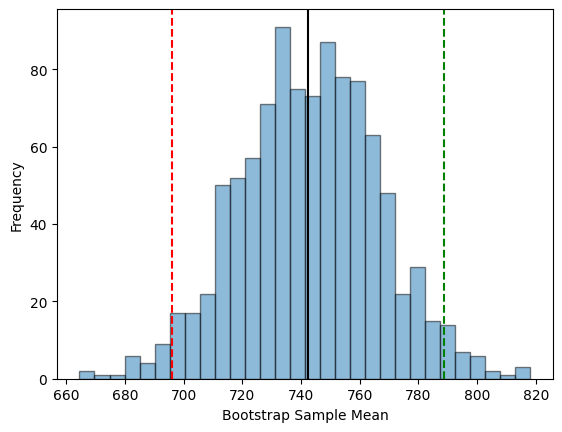

In [53]:
#step 4: Visualizing the bootstrap distribution
plt.hist(boots_m, bins=30, edgecolor='k', alpha = 0.5)
plt.axvline(boots_l, color='red', linestyle='dashed')
plt.axvline(boots_u,color='green', linestyle='dashed' )
plt.axvline(sm, color='black', linestyle='solid')
plt.xlabel("Bootstrap Sample Mean")
plt.ylabel("Frequency")
plt.show()